# Lab 5: The Sampling Distribution

Please complete this lab by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Thursday, March 12**.

In [1]:
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## The Central Limit Theorem

The **Central Limit Theorem** is perhaps the most famous theorem in statistics and is used as the basis for many statistical hypothesis tests. In short, the Central Limit Theorem states that as long as you have a large enough sample size, the sampling distribution of sample means or sample proportions will be approximately Normal (that is, bell-shaped, unimodal, symmetric). This is extremely valuable, because it allows us to determine the sampling distribution given that an initial assumption (the null hypothesis) is true, and evaluate whether our data is unusual or unlikely within that distribution. 

In this lab, we will explore some of the concepts of the Central Limit Theorem, use simulations to generate an empirical sampling distribution, and form the basis of how hypothesis testing will be done. 

## Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2014-2015 NBA season. The data was collected from [Basketball-Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

Run the next cell to load the two datasets.

In [2]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


As in the previous lab, we'll also make a comlete dataset containing the full data.

In [3]:
full_data = salary_data.join("PlayerName", player_data, "Name")
full_data.show(5)

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156


Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points the player scored in a season for every **\$1000 of salary** (*Note*: the `Salary` column is in dollars, not thousands of dollars). For example, Al Horford scored 1156 points and has a salary of **\$12 million.** This is equivalent to 12,000 thousands of dollars, so his value is $\frac{1156}{12000}$.

<font color = 'red'>**Question 1. Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values. Specify bins that make the histogram informative, and don't forget your units! Remember that `hist()` takes in an optional third argument that allows you to specify the units!**</font>

*Hint*: Informative histograms contain a majority of the data and **exclude outliers**.

In [6]:
salary_thousands = full_data.column('Salary')/1000
value = full_data.column('Points')/salary_thousands
full_data_with_value = full_data.with_columns('Value', value)

In [8]:
def calculate_value(points, salary):
    return points/salary * 1000

In [10]:
value2 = full_data.apply(calculate_value, 'Points','Salary')

In [11]:
full_data_with_value = full_data.with_columns('Value', value2)
full_data_with_value.show(5)

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Value
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133,2.12623
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954,0.83269
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243,0.0608711
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213,0.114805
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156,0.0963333


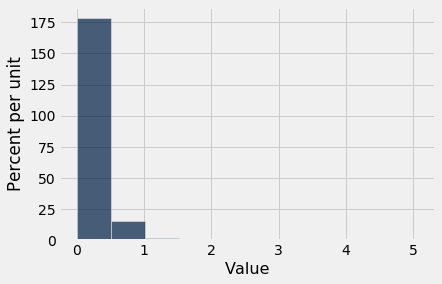

In [15]:
full_data_with_value.hist('Value')

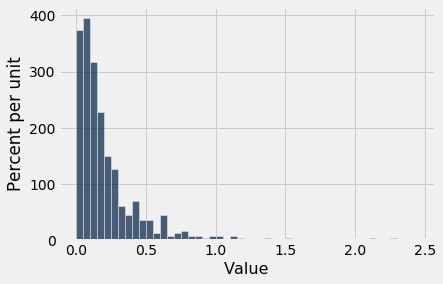

In [14]:
full_data_with_value.hist('Value', bins = np.arange(0,2.5,.05))

Now suppose we weren't able to find out every player's salary (perhaps it was too costly to interview each player).  Instead, we have gathered a *simple random sample* of 100 players' salaries.  The cell below loads those data.

In [16]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data.show(3)

PlayerName,Salary
C.J. Watson,2106720
Taj Gibson,8000000
Jerrelle Benimon,35000


<font color = 'red'>**Question 2. Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2. Use the same bins, too.**</font>

*Hint:* This will take several steps.

In [17]:
sample_data = player_data.join('Name', sample_salary_data, 'PlayerName')
sample_value = sample_data.apply(calculate_value, 'Points','Salary')

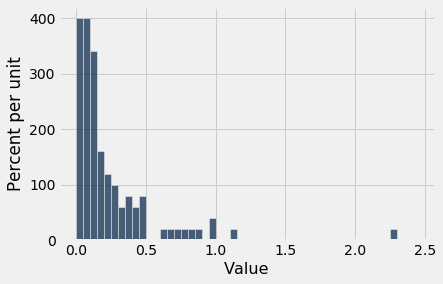

In [19]:
sample_data_with_value = sample_data.with_columns('Value', sample_value)
sample_data_with_value.hist('Value', bins = np.arange(0,2.5,.05))

In [46]:
np.mean(sample_data_with_value.column('Value'))

0.23679566022372703

Now let us summarize what we have seen. To guide you, we have written most of the summary already.

<font color = 'red'>**Question 3. Complete the statements below by filling in the [SQUARE BRACKETS].**</font>

*Hint 1:* For a refresher on distribution types, check out [Section 10.1](https://www.inferentialthinking.com/chapters/10/1/empirical-distributions.html)

Copy the following two statements below into the next cell, and then fill in the [SQUARE BRACKETS].

* The plot in question 1 displayed a(n) [DISTRIBUTION TYPE] distribution of the population of [A NUMBER] players.

* The plot in question 2 displayed a(n) [DISTRIBUTION TYPE] distribution of the sample of [A NUMBER] players.


*Write your answer here, replacing this text.*

<font color = 'red'>**Question 4. Compare the distributions from questions 1 and 2. How are the different? How are they similar?**</font>


*Write your answer here, replacing this text.*

## Earthquakes


The next cell loads a table containing information about **every earthquake with a magnitude above 4.5** in 2017, compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [20]:
earthquakes = Table().read_table('earthquakes_2017.csv').select(['time', 'mag', 'place'])
earthquakes.show(10)

time,mag,place
2017-12-31T23:48:50.980Z,4.8,"30km SSE of Pagan, Northern Mariana Islands"
2017-12-31T20:59:02.500Z,5.1,Southern East Pacific Rise
2017-12-31T20:27:49.450Z,5.2,Chagos Archipelago region
2017-12-31T19:42:41.250Z,4.6,"18km NE of Hasaki, Japan"
2017-12-31T16:02:59.920Z,4.5,Western Xizang
2017-12-31T15:50:22.510Z,4.5,"156km SSE of Longyearbyen, Svalbard and Jan Mayen"
2017-12-31T14:53:32.590Z,5.1,"41km S of Daliao, Philippines"
2017-12-31T14:51:58.200Z,5.1,"132km SSW of Lata, Solomon Islands"
2017-12-31T12:24:13.150Z,4.6,"79km SSW of Hirara, Japan"
2017-12-31T04:02:18.500Z,4.8,"10km W of Korini, Greece"


We’re interested in all earthquakes with a magnitude above 4.5 that occurred in 2017. However, we generally don’t have access to this entire population of earthquakes. Instead, if we sample correctly, we can take a small subsample of earthquakes in this year to get an idea about the distribution of magnitudes above 4.5 throughout the year!

In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes.

In [21]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(100))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(np.arange(100))
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.422999999999999, 4.7749999999999995]

<font color = 'red'>**Question 5. Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)?**</font>

*Hint:* Consider the ordering of the `earthquakes` table. 


*Write your answer here, replacing this text.*

<font color = 'red'>**Question 6. Write code that produces a sample that should represent the population of size 500. Then, take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively.**</font>

*Hint:* In class, what sort of samples can properly represent the population?

In [34]:
representative_sample = earthquakes.sample(500)
print(representative_sample.num_rows)
representative_sample.show(5)

500


time,mag,place
2017-08-06T14:06:41.690Z,4.5,Off the coast of Central America
2017-02-27T11:26:30.860Z,4.6,"69km WNW of Arawa, Papua New Guinea"
2017-05-10T23:45:10.590Z,4.6,"96km ENE of Visokoi Island, South Georgia and the South ..."
2017-04-02T18:15:03.010Z,4.5,"285km SE of Hachijo-jima, Japan"
2017-09-12T06:43:43.340Z,4.6,"114km SW of Chirikof Island, Alaska"


In [25]:
representative_mean = np.mean(representative_sample.column('mag'))
representative_mean

4.8127200000000006

In [26]:
np.mean(earthquakes.column('mag'))

4.81283962264151

<font color = 'red'>**Question 7. Suppose we want to figure out what the median earthquake magnitude out of all earthquakes above 4.5 was in 2017, but we are tasked with doing this only with a sample of 500 from the earthquakes table.**</font>

To determine whether trying to find the median magnitude from a random sample of 500 is a plausible idea, write code that simulates the median of a random sample of size 500 from the `earthquakes` table 5000 times. Assign your array of medians to `medians`. 

In [27]:
np.median(make_array(1,2,3,4,5,6))

3.5

In [44]:
medians = make_array()

for i in np.arange(5000): 
    '''
    1) Sample 50 earthquakes.
    2) Find median of those 500 earthquakes.
    3) Store the median.
    '''
    sample_earthquakes = earthquakes.sample(50)
    median_sample = np.median(sample_earthquakes.column('mag'))
    medians = np.append(medians,median_sample)

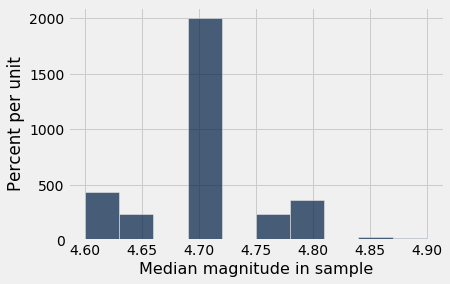

In [45]:
#Histogram of your median
Table().with_column('Median magnitude in sample', medians).hist('Median magnitude in sample') 

<font color = 'red'>**Question 8. We want to see if a random sample of size 500 is likely to help you determine the median magnitude earthquake in the population. To help determine this, find the magnitude of the (actual) median earthquake in 2017.**</font>

<font color = 'red'>**Question 9. Repeat the process in Question 7 and 8, except using a random sample of 100 instead. What changes?**</font>

## Sampling Basketball Players (again)

Before, we used sample data that had already been created for you. Here, we'll do the sampling process ourselves. This time, we'll be looking at the **assist to turnover ratio**. 

Suppose we are interested in the mean assist to turnover ratio (calculated using assists divided by turnovers). We want to know what would happen if we were to take many samples from the population and calculate the mean assist to turnover ratio for each of those samples. Remember, `player_data` contains the full population of all players in the NBA.

<font color = 'red'>**Question 10. Take a sample of 50 players from `player_data`. Calculate the assist to turnover ratio for that sample, and find the mean assist to turnover ratio.**</font>

In [4]:
player_data.show(5)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Anthony Davis,21,NOP,68,696,149,100,200,95,1656
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946


In [5]:
sample_data = player_data.sample(50, with_replacement = False)
sample_data.show(5)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Troy Daniels,23,TOT,47,33,22,6,1,20,176
Malcolm Thomas,26,PHI,17,56,7,3,1,13,45
Victor Oladipo,22,ORL,72,302,295,120,19,204,1292
Sebastian Telfair,29,OKC,16,30,45,10,0,18,134
Ryan Kelly,23,LAL,52,146,92,30,24,37,332


In [6]:
def find_ratio(assist, turnovers):
    if turnovers == 0:
        return 0
    else:
        return assist/turnovers

In [7]:
data_with_ratio = sample_data.with_columns('Assists/TO Ratio', 
                         sample_data.apply(find_ratio,'Assists','Turnovers'))
data_with_ratio.show(5)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Assists/TO Ratio
Troy Daniels,23,TOT,47,33,22,6,1,20,176,1.1
Malcolm Thomas,26,PHI,17,56,7,3,1,13,45,0.538462
Victor Oladipo,22,ORL,72,302,295,120,19,204,1292,1.44608
Sebastian Telfair,29,OKC,16,30,45,10,0,18,134,2.5
Ryan Kelly,23,LAL,52,146,92,30,24,37,332,2.48649


In [8]:
np.mean(data_with_ratio.column('Assists/TO Ratio'))

1.5387840433415299

<font color = 'red'>**Question 11. We will now simulate what happened in question 10 many times. Simulate the process of taking samples of 50 players and calculating mean assist to turnover ratio 10,000 times. Store the 10,000 means in `sample_means`. Create a histogram of the sample means, and find the mean value of the sample means.**</font>

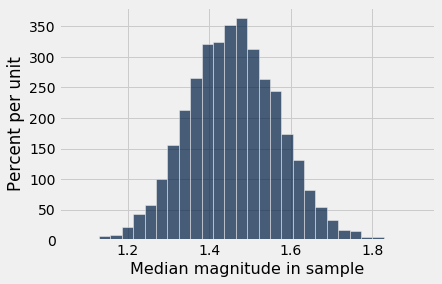

In [11]:
sample_means = make_array()
for i in np.arange(10000):
    data_samples = player_data.sample(50, with_replacement = False)
    data = data_samples.with_columns('Assists/TO Ratio', data_samples.apply(find_ratio,'Assists','Turnovers'))
    sample_mean = np.mean(data.column('Assists/TO Ratio'))
    sample_means = np.append(sample_means, sample_mean)
sample_means
Table().with_column('Median magnitude in sample', sample_means).hist('Median magnitude in sample', bins = 30)


<font color = 'red'>**Question 12. Based on your simulation in Question 11, what would you expect the population mean assist to turnover ratio to be?**</font>

*Write your answer here, replacing this text.*

<font color = 'red'>**Question 12. Using `player_data`, find the actual population mean assist to turnover ratio, and compare it to what you answered in Question 11.**</font>